In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [54]:
name=['vc_tnblx','vc_hzxb','area_type','addrcode','diagnosis_age','disease_id1','week','inf_day','inf_weeek','inf_month','target','group_id']
tnb_jiehe_data = pd.read_csv("./tnb_jiehe.csv",encoding='utf-8')

In [55]:
data = tnb_jiehe_data[name]
data['addrcode']=data['addrcode']/100
data['addrcode']=data['addrcode']%10000
data['addrcode'] = data['addrcode'].astype(int)
data = data[data['addrcode']<1199]  #删除外省人
data.head(1)

E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
E:\Users\wang\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,vc_tnblx,vc_hzxb,area_type,addrcode,diagnosis_age,disease_id1,week,inf_day,inf_weeek,inf_month,target,group_id
0,2,1,1,302,60,130,10,1,1,1,a,29


In [56]:
data.groupby('group_id').count()

,vc_tnblx,vc_hzxb,area_type,addrcode,diagnosis_age,disease_id1,week,inf_day,inf_weeek,inf_month,target
group_id,,,,,,,,,,,
3,7,7,7,7,7,7,7,7,7,7,7
4,24,24,24,24,24,24,24,24,24,24,24
6,6,6,6,6,6,6,6,6,6,6,6
7,3,3,3,3,3,3,3,3,3,3,3
8,152,152,152,152,152,152,152,152,152,152,152
9,14,14,14,14,14,14,14,14,14,14,14
16,586,586,586,586,586,586,586,586,586,586,586
17,221,221,221,221,221,221,221,221,221,221,221
18,4849,4849,4849,4849,4849,4849,4849,4849,4849,4849,4848


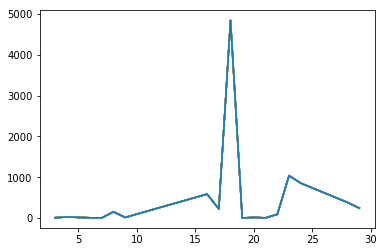

In [65]:
group_id=data.groupby('group_id').count()
plt.plot(group_id)
plt.show()

In [10]:
class_le = LabelEncoder()
data['target']=class_le.fit_transform(data['target'])

In [29]:
X_train,X_test,y_train,y_test = train_test_split(data[name[0:11]],data[name[11]],test_size=0.4,random_state=42)
clf = DecisionTreeClassifier(max_depth=6,min_samples_split=6)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.62608012568735272

In [30]:
clf.score(X_test,y_test)

0.59216725559481742

In [31]:
tr_predict = clf.predict(X_test)
print(classification_report(y_test,tr_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        10
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         2
          8       1.00      0.01      0.03        67
          9       0.00      0.00      0.00         4
         16       0.43      0.08      0.14       237
         17       0.63      0.56      0.59        90
         18       0.63      0.92      0.75      1934
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00         7
         21       0.00      0.00      0.00         2
         22       0.00      0.00      0.00        43
         23       0.45      0.18      0.25       394
         24       0.39      0.14      0.20       355
         28       0.26      0.22      0.24       159
         29       0.00      0.00      0.00        85

avg / total       0.53      0.59      0.51  

In [32]:
forest = RandomForestClassifier(n_estimators=3000,random_state=42,n_jobs=3)
forest.fit(X_train,y_train)
forest.score(X_train,y_train)

0.99764336213668503

In [33]:
forest.score(X_test,y_test)

0.65459363957597172

In [34]:
tr_predict = clf.predict(X_test)
print(classification_report(y_test,tr_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        10
          6       0.00      0.00      0.00         2
          7       0.00      0.00      0.00         2
          8       1.00      0.01      0.03        67
          9       0.00      0.00      0.00         4
         16       0.43      0.08      0.14       237
         17       0.63      0.56      0.59        90
         18       0.63      0.92      0.75      1934
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00         7
         21       0.00      0.00      0.00         2
         22       0.00      0.00      0.00        43
         23       0.45      0.18      0.25       394
         24       0.39      0.14      0.20       355
         28       0.26      0.22      0.24       159
         29       0.00      0.00      0.00        85

avg / total       0.53      0.59      0.51  

In [35]:
feat_labels = data.columns[:-1]
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%2d %-*s %f"%(f+1,30,feat_labels[f],importance[indices[f]]))

 1 vc_tnblx                       0.230596
 2 vc_hzxb                        0.190265
 3 area_type                      0.189683
 4 addrcode                       0.137160
 5 diagnosis_age                  0.064251
 6 disease_id1                    0.052212
 7 week                           0.042145
 8 inf_day                        0.028581
 9 inf_weeek                      0.025440
10 inf_month                      0.025133
11 target                         0.014533


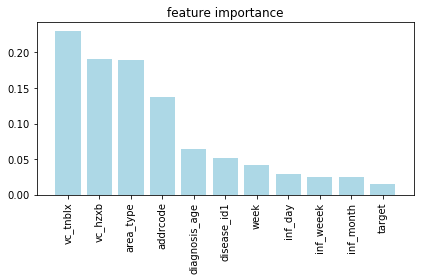

In [37]:
plt.title("feature importance")
plt.bar(range(X_train.shape[1]),importance[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()